# Z Score
### Using Basic python

In [14]:
# Given values
mean = 0.5
std_dev = 0.2
X = 0.9  # temperature anomaly

# Calculate Z-score
z_score = (X - mean) / std_dev

print(f"Z-score: {z_score}")


Z-score: 2.0


In [15]:
from scipy.stats import zscore
import numpy as np

# Given values
mean = 0.5
std_dev = 0.2
X = 0.9  # temperature anomaly

# Manually create a data array with the anomaly value
data = np.array([X])

# Standardize using the mean and std deviation
z_score = (data - mean) / std_dev

print(f"Z-score: {z_score[0]}")


Z-score: 2.0


# T Score
### Housing in elmira

In [16]:
from scipy import stats

# Given values
samples = [450,470,430,490,410,460,440,480,500,455]
sample_mean = 458.5  # mean in thousand dollars
sample_standard_deviation = 25.21  # standard deviation in thousand dollars
sample_size = 10  # number of samples
house_price = 500  # house price in thousand dollars

# Calculate the T-score
T_score = (house_price - sample_mean) / (sample_standard_deviation / (sample_size ** 0.5))

print(f"T-score: {T_score}")

# Given T-score
T_score = 5.21

# Degrees of freedom (n - 1 for a single sample)
df = 10 - 1  # 9

# Calculate the cumulative probability
cumulative_probability = stats.t.cdf(T_score, df)

print(f"Cumulative Probability: {cumulative_probability}")


T-score: 5.205653427091938
Cumulative Probability: 0.9997217131801778


With a T-score of 5.21, this indicates that the house priced at $500,000 is significantly different from the average house price of your sample. 

Here’s what this T-score means in simple terms:

1. **Very Unusual**: A T-score of 5.21 is quite high, which means the $500,000 house is more than 5 standard deviations away from the average price in your sample. This is a strong indicator that $500,000 is much higher than most of the houses in your sample.

2. **Rare**: In statistics, such a high T-score suggests that the house is in a very rare category compared to your sample data. It's much more expensive than what the average house in your sample costs.

3. **Statistical Significance**: Typically, a T-score beyond 2 or 3 suggests that the result is statistically significant, meaning it’s not likely due to random chance. A T-score of 5.21 indicates that the house’s price is very unlikely to be a random fluctuation in your sample.

# Activity #1

+---+---------------------------------------+--------------+---------------+---------------+---------+
|   |               Products                | October 2023 | November 2023 | December 2023 | Dollars |
+---+---------------------------------------+--------------+---------------+---------------+---------+
| 0 |   Beef stewing cuts, per kilogram 4   |    17.66     |     20.48     |     19.7      |   nan   |
| 1 |  Beef striploin cuts, per kilogram 4  |    25.47     |     23.95     |     20.67     |   nan   |
| 2 | Beef top sirloin cuts, per kilogram 4 |    20.04     |     21.18     |     23.21     |   nan   |
| 3 |     Beef rib cuts, per kilogram 4     |    23.17     |     31.43     |     26.23     |   nan   |
| 4 |      Ground beef, per kilogram 4      |    11.82     |     11.72     |     12.71     |   nan   |
+---+---------------------------------------+--------------+---------------+---------------+---------+


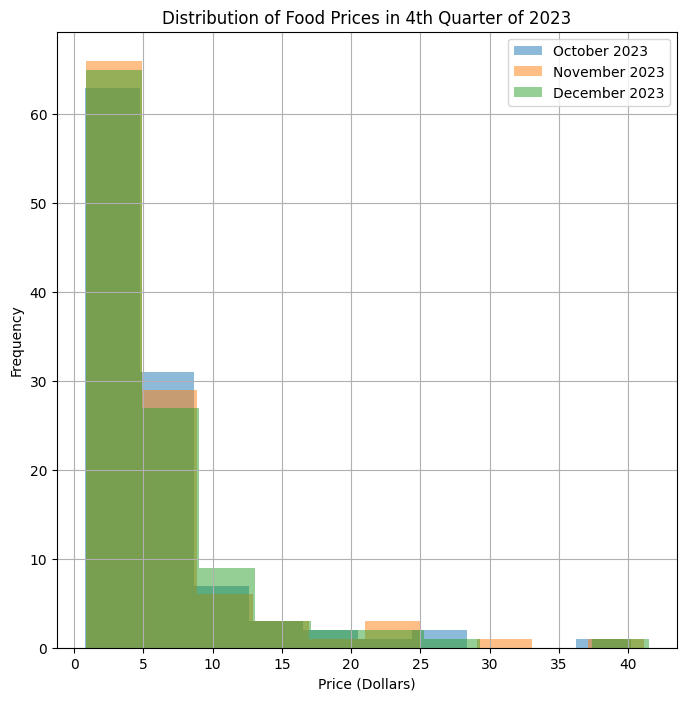


Shapiro-Wilk Test Results:
+---------------+--------------------+-----------------------+
|     Month     |    W-Statistic     |        P-Value        |
+---------------+--------------------+-----------------------+
| December 2023 | 0.6465264751916929 | 6.755275099262209e-15 |
|    Dollars    |        nan         |          nan          |
| November 2023 | 0.6198374810500512 | 1.871884841756551e-15 |
| October 2023  | 0.6408019734044703 | 5.10033301909149e-15  |
+---------------+--------------------+-----------------------+

Z-scores and T-scores for first few rows:
+---+---------------------------------------+--------------+-------+--------------------+--------------------+
|   |               Products                |    Month     | Price |      Z-score       |      T-score       |
+---+---------------------------------------+--------------+-------+--------------------+--------------------+
| 0 |   Beef stewing cuts, per kilogram 4   | October 2023 | 17.66 | 2.0510891618907965 | 21

C:\Users\sreeh\AppData\Local\Temp\ipykernel_2488\2723841577.py:38: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  shapiro_results = df_melted.groupby('Month').apply(lambda x: stats.shapiro(x['Price'].dropna()))
C:\Users\sreeh\AppData\Local\Temp\ipykernel_2488\2723841577.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shapiro_results = df_melted.groupby('Month').apply(lambda x: stats.shapiro(x['Price'].dropna()))


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy import stats
import numpy as np

# Path to the CSV file
file_path = "./1810024501-eng.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the DataFrame using tabulate
print(tabulate(df.head(), headers='keys', tablefmt='pretty'))

# Melt the DataFrame to have a long format suitable for plotting
df_melted = df.melt(id_vars='Products', var_name='Month', value_name='Price')

# Plot histograms for each month
plt.figure(figsize=(8, 8))
for month in ['October 2023', 'November 2023', 'December 2023']:
    plt.hist(df_melted[df_melted['Month'] == month]['Price'].dropna(), bins=10, alpha=0.5, label=month)

plt.xlabel('Price (Dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Food Prices in 4th Quarter of 2023')
plt.legend()
plt.grid(True)
plt.show()

# Compute Z-scores for the prices
df_melted['Z-score'] = df_melted.groupby('Month')['Price'].transform(lambda x: (x - x.mean()) / x.std())

# Compute T-scores for the prices
df_melted['T-score'] = df_melted.groupby('Month')['Price'].transform(lambda x: (x - x.mean()) / (x.std() / np.sqrt(len(x))))

# Apply Shapiro-Wilk Normality Test
shapiro_results = df_melted.groupby('Month').apply(lambda x: stats.shapiro(x['Price'].dropna()))
shapiro_results_df = pd.DataFrame(shapiro_results.tolist(), index=shapiro_results.index, columns=['W-Statistic', 'P-Value'])

# Print results using tabulate
print("\nShapiro-Wilk Test Results:")
print(tabulate(shapiro_results_df, headers='keys', tablefmt='pretty'))

# Interpret results
print("\nZ-scores and T-scores for first few rows:")
print(tabulate(df_melted.head(), headers='keys', tablefmt='pretty'))

# Assessment Based on P-values
for month, (stat, p_value) in shapiro_results.items():
    print(f'\nMonth: {month}')
    print(f'Shapiro-Wilk Test Statistic: {stat}')
    print(f'P-value: {p_value}')
    if p_value < 0.05:
        print('Conclusion: Data significantly deviates from a normal distribution.')
    else:
        print('Conclusion: Data does not significantly deviate from a normal distribution.')
